# Prophet with rolling method

In this notebook, instead of directly usage of capacity usages, rolling column is added to data for different values to find the trend better.

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df = pd.read_csv("cap5.csv")
df.head()

,cycle,ambient_temperature,datetime,capacity
0,1,24,2008-04-02 15:25:41,1.856487
1,2,24,2008-04-02 19:43:48,1.846327
2,3,24,2008-04-03 00:01:06,1.835349
3,4,24,2008-04-03 04:16:37,1.835263
4,5,24,2008-04-03 08:33:25,1.834646


In [19]:
df["ds"] = pd.to_datetime(df["datetime"],format = "%Y-%m-%d %H:%M:%S")

In [20]:
df["roll_2"] = df["capacity"].rolling(2).mean()

In [21]:
df["roll_3"] = df["capacity"].rolling(3).mean()

In [22]:
df["roll_4"] = df["capacity"].rolling(4).mean()

In [23]:
df["roll_5"] = df["capacity"].rolling(5).mean()

In [24]:
df["roll_7"] = df["capacity"].rolling(7).mean()

In [25]:
df["roll_10"] = df["capacity"].rolling(10).mean()
df.head()

,cycle,ambient_temperature,datetime,capacity,ds,roll_2,roll_3,roll_4,roll_5,roll_7,roll_10
0,1,24,2008-04-02 15:25:41,1.856487,2008-04-02 15:25:41,NaN,NaN,NaN,NaN,NaN,NaN
1,2,24,2008-04-02 19:43:48,1.846327,2008-04-02 19:43:48,1.851407,NaN,NaN,NaN,NaN,NaN
2,3,24,2008-04-03 00:01:06,1.835349,2008-04-03 00:01:06,1.840838,1.846055,NaN,NaN,NaN,NaN
3,4,24,2008-04-03 04:16:37,1.835263,2008-04-03 04:16:37,1.835306,1.838980,1.843357,NaN,NaN,NaN
4,5,24,2008-04-03 08:33:25,1.834646,2008-04-03 08:33:25,1.834954,1.835086,1.837896,1.841614,NaN,NaN


In [26]:
df_2 = df.rename(columns = {"roll_2" : "y"})
df_3 = df.rename(columns = {"roll_3" : "y"})
df_4 = df.rename(columns = {"roll_4" : "y"})
df_5 = df.rename(columns = {"roll_5" : "y"})
df_7 = df.rename(columns = {"roll_7" : "y"})
df_10 = df.rename(columns = {"roll_10" : "y"})

In [27]:
from prophet import Prophet
def fun_p(df_):    
    m = Prophet()
    m.fit(df_)
    future = m.make_future_dataframe(periods=5)
    forecast = m.predict(future)
    forecast.rename(columns = {"yhat" : "y"}, inplace = True)
    forecast = forecast[["ds","y"]]
    forecast["y"].plot()
    df_["y"].plot()
    se = np.square(forecast['y'] - df["capacity"])
    mse = np.mean(se)
    rmse = np.sqrt(mse)
    print("rmse " + str(rmse))
    se = np.square(forecast['y'].tail(25)[:20] - df["capacity"].tail(20))
    mse = np.mean(se)
    rmse_test = np.sqrt(mse)
    print("rmse " + str(rmse_test))
    return [rmse,rmse_test]

In [28]:
df_real

,cycle,ambient_temperature,ds,y,roll_2,roll_3,roll_4,roll_5,roll_7,roll_10
0,1,24,2008-04-02 15:25:41,1.856487,NaN,NaN,NaN,NaN,NaN,NaN
1,2,24,2008-04-02 19:43:48,1.846327,1.851407,NaN,NaN,NaN,NaN,NaN
2,3,24,2008-04-03 00:01:06,1.835349,1.840838,1.846055,NaN,NaN,NaN,NaN
3,4,24,2008-04-03 04:16:37,1.835263,1.835306,1.838980,1.843357,NaN,NaN,NaN
4,5,24,2008-04-03 08:33:25,1.834646,1.834954,1.835086,1.837896,1.841614,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
163,164,24,2008-05-26 10:44:38,1.293464,1.295769,1.296475,1.298209,1.299238,1.301003,1.305233
164,165,24,2008-05-26 15:30:43,1.288003,1.290734,1.293180,1.294357,1.296168,1.298175,1.302170
165,166,24,2008-05-26 20:21:04,1.287453,1.287728,1.289640,1.291748,1.292976,1.295950,1.299568
166,167,24,2008-05-27 15:52:41,1.309015,1.298234,1.294824,1.294484,1.295202,1.296758,1.299149


11:18:31 - cmdstanpy - INFO - Chain [1] start processing
11:18:32 - cmdstanpy - INFO - Chain [1] done processing


rmse 0.011767455896871046
rmse 0.010620077860121747


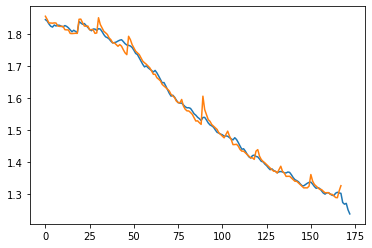

In [29]:
dic = {}
dic_test = {}
df_real = df.rename(columns = {"capacity" : "y"})
arr = fun_p(df_real)
dic[1] = arr[0]
dic_test[1] = arr[1]

11:18:34 - cmdstanpy - INFO - Chain [1] start processing
11:18:34 - cmdstanpy - INFO - Chain [1] done processing


rmse 0.009931633653047401
rmse 0.010395587978570757


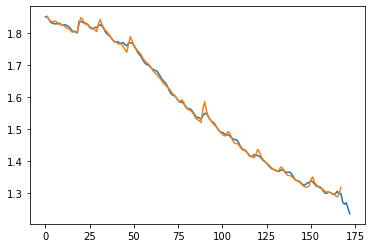

In [30]:
arr = fun_p(df_2)
dic[2] = arr[0]
dic_test[2] = arr[1]

11:18:39 - cmdstanpy - INFO - Chain [1] start processing
11:18:39 - cmdstanpy - INFO - Chain [1] done processing


rmse 0.010586588969771573
rmse 0.011208507763570333


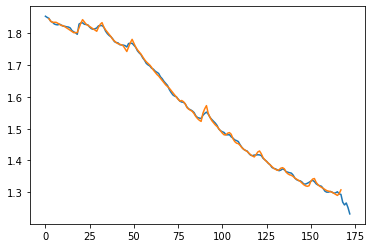

In [31]:
arr = fun_p(df_3)
dic[3] = arr[0]
dic_test[3] = arr[1]

11:18:40 - cmdstanpy - INFO - Chain [1] start processing
11:18:40 - cmdstanpy - INFO - Chain [1] done processing


rmse 0.011976858270529647
rmse 0.011735609483808595


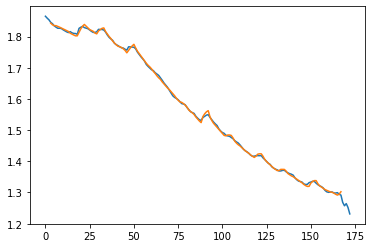

In [32]:
arr = fun_p(df_4)
dic[4] = arr[0]
dic_test[4] = arr[1]

11:18:42 - cmdstanpy - INFO - Chain [1] start processing
11:18:42 - cmdstanpy - INFO - Chain [1] done processing


rmse 0.0136312564837346
rmse 0.012508984502340037


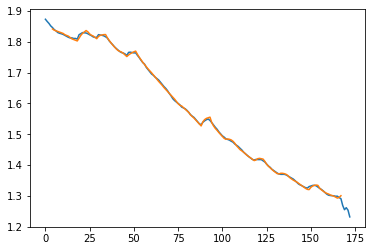

In [33]:
arr = fun_p(df_5)
dic[5] = arr[0]
dic_test[5] = arr[1]

11:18:43 - cmdstanpy - INFO - Chain [1] start processing
11:18:44 - cmdstanpy - INFO - Chain [1] done processing


rmse 0.017245830936988248
rmse 0.012945083157384182


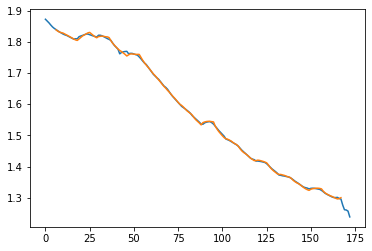

In [34]:
arr = fun_p(df_7)
dic[7] = arr[0]
dic_test[7] = arr[1]

11:18:45 - cmdstanpy - INFO - Chain [1] start processing
11:18:45 - cmdstanpy - INFO - Chain [1] done processing


rmse 0.010586588969771573
rmse 0.011208507763570333


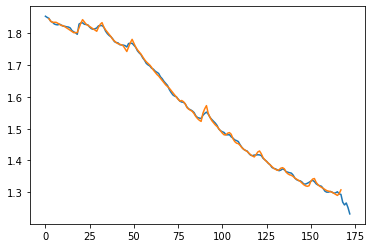

In [35]:
arr = fun_p(df_3)
dic[10] = arr[0]
dic_test[10] = arr[1]

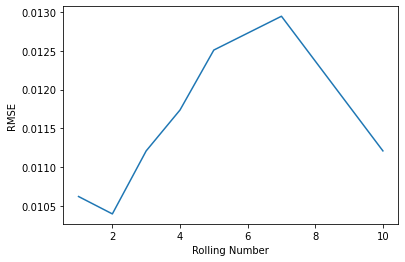

In [36]:
#names = list(dic.keys())
#values = list(dic.values())
#plt.plot(names,values)
names = list(dic_test.keys())
values = list(dic_test.values())
plt.plot(names,values)
plt.xlabel("Rolling Number")
plt.ylabel("RMSE")
plt.show()

12:29:47 - cmdstanpy - INFO - Chain [1] start processing
12:29:47 - cmdstanpy - INFO - Chain [1] done processing


rmse 0.009931633653047401


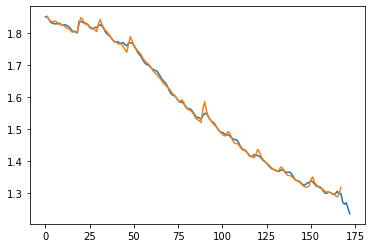

In [46]:
m = Prophet()
m.fit(df_2)
future = m.make_future_dataframe(periods=5)
forecast = m.predict(future)
forecast.rename(columns = {"yhat" : "y"}, inplace = True)
forecast = forecast[["ds","y"]]
forecast["y"].plot()
df_2["y"].plot()
se = np.square(forecast['y'] - df["capacity"])
mse = np.mean(se)
rmse = np.sqrt(mse)
print("rmse " + str(rmse))